In [2]:
# Data Imports
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Model Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Function to evaluate score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall,2),
                  "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [11]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'clf', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'clf__bootstrap', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__max_samples', 'clf__min_impurity_decrease', 'clf__min_impurity_split', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__n_estimators', 'clf__n_jobs', 'clf__oob_score', 'clf__random_state', 

In [6]:
# Import the data
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
data.drop('ever_married', axis=1)
data.drop('id', axis=1)
data.drop('Residence_type', axis=1)


# Define different features and transformer pipeline
numeric_feature = ["bmi"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Fill missing BMI values, then convert to numbers
preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, numeric_feature)
                ])

# Create a preprocessing and modelling pipeline
clf = Pipeline(steps=[("preprocessor", preprocessor),
                     ("clf", RandomForestClassifier())])

# Use GridSearchCV
param_grid = {
         'preprocessor__num__imputer__strategy': ['mean', 'median'],
         'clf__n_estimators': [200, 500],
         'clf__max_depth': [None],
         'clf__max_features': ['auto'],
         'clf__min_samples_split': [6],
         'clf__min_samples_leaf': [2]}

grid_model = GridSearchCV(clf,
                   param_grid,
                   cv=2, verbose=2)

# Set the data & Split
X = data.drop("stroke", axis=1)
y = data["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

grid_model.fit(X_train, y_train)
grid_model.score(X_test,y_test)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=2, clf__min_samples_split=6, clf__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=2, clf__min_samples_split=6, clf__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=2, clf__min_samples_split=6, clf__n_estimators=200, preprocessor__num__imputer__strategy=median; total time=   0.5s
[CV] END clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=2, clf__min_samples_split=6, clf__n_estimators=200, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=2, clf__min_samples_split=6, clf__n_estimators=500, preprocessor__num__imputer__strategy=mean; total 

0.9432485322896281

In [7]:
import pickle

pickle.dump(grid_model, open("stroke_algorithm_RFC3.pkl", "wb"))

In [14]:
load_pkl = pickle.load(open("stroke_algorithm_RFC.pkl", "rb"))
load_pkl.score(X_test,y_test)

0.958904109589041

In [4]:
import matplotlib.pyplot as plt

In [14]:
plotdata = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

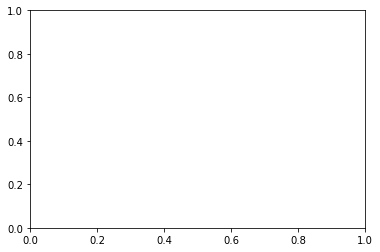

In [6]:
fig, ax = plt.subplots()

In [8]:
ax.hist(plotdata['stroke']);

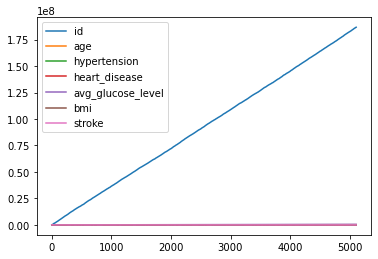

In [9]:
plotdata.cumsum().plot();

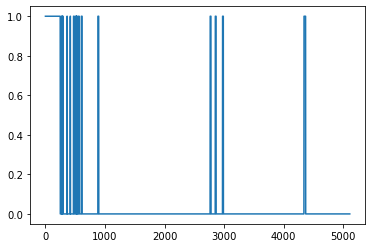

In [10]:
plotdata['stroke'].plot();

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\zachb\Desktop\C964\env\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\zachb\Desktop\C964\env\lib\site-packages\matplotlib\ticker.py:665: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


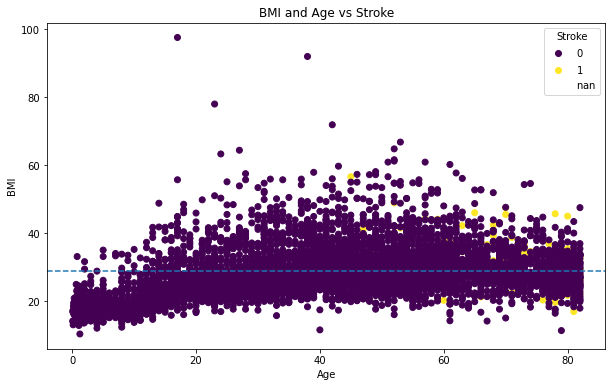

In [23]:
hadstroke = plotdata[plotdata['stroke'] == 1]

fig,ax = plt.subplots(figsize=(10,6))

scatter = ax.scatter(plotdata['age'],
                    plotdata['bmi'],
                    c=plotdata['stroke'])

ax.set(title="BMI and Age vs Stroke",
      xlabel="Age",
      ylabel="BMI")
ax.legend(*scatter.legend_elements(),title="Stroke")

ax.axhline(plotdata['bmi'].mean(), linestyle="--");

In [26]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\zachb\Desktop\C964\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [47]:
plotdata = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
hadstroke = plotdata[plotdata.stroke==1]

hadstroke['age'].sample(5)

199    74.0
90     79.0
108    79.0
39     49.0
186    63.0
Name: age, dtype: float64

<ipython-input-54-1c1227e33c43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hadstroke.gender[hadstroke.gender=='Male'] = 1
<ipython-input-54-1c1227e33c43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hadstroke.gender[hadstroke.gender=='Female'] = 0


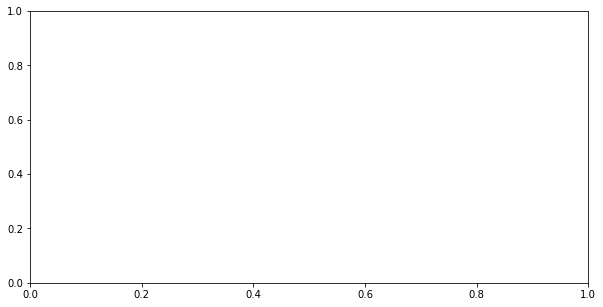

In [54]:
import seaborn as sns
from matplotlib.pyplot import show,legend
fig,ax = plt.subplots(figsize=(10,5))

hadstroke.gender[hadstroke.gender=='Male'] = 1
hadstroke.gender[hadstroke.gender=='Female'] = 0

In [49]:
hadstroke['age'].sample(5)

197    69.0
247    71.0
37     72.0
20     71.0
16     64.0
Name: age, dtype: float64

C:\Users\zachb\Desktop\C964\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


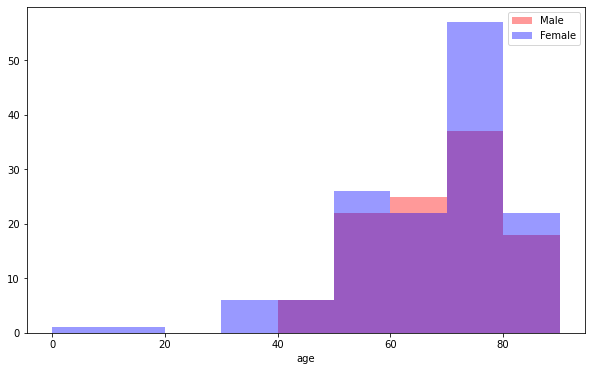

In [63]:
bins = range(0,100,10)
plt.figure(figsize=(10,6))
ax = sns.distplot(hadstroke.age[hadstroke.gender==1], color='red', kde=False, bins=bins, label="Male")
sns.distplot(hadstroke.age[hadstroke.gender==0], ax=ax, color='blue', kde=False, bins=bins, label="Female")
                       
legend()
show();

<AxesSubplot:>

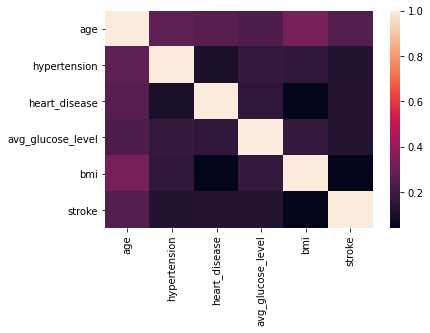

In [77]:
droppeddata = plotdata.drop('id', axis=1)

sns.heatmap(droppeddata.corr())